In [1]:
!pip install streamlit tensorflow pandas transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


# Loading Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import streamlit as st
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from keras.metrics import MeanAbsoluteError
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Loading Model from Transformers and Data Preprocessing and Tokenization

In [8]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

data = pd.read_csv("/content/ielts_writing_dataset (1).csv")
data.head()
value_counts = data['Overall'].value_counts()
data = data[data['Overall'].isin(value_counts[value_counts > 1].index)]


X = data["Essay"]
y = data["Overall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)
X_train = bert_tokenizer(list(X_train), padding=True, truncation=True, return_tensors='tf', max_length = 512)['input_ids']
X_test = bert_tokenizer(list(X_test), padding=True, truncation=True, return_tensors='tf', max_length = 512)['input_ids']

In [18]:
data.head()

,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0
3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,NaN,NaN,NaN,NaN,NaN,5.5
4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,NaN,NaN,NaN,NaN,NaN,7.0


# Initialize untrained head

In [9]:
reg = Sequential()
reg.add(Flatten())
reg.add(Dense(64, activation='relu'))
reg.add(Dropout(0.3))
reg.add(Dense(32, activation='relu'))
reg.add(Dropout(0.3))
reg.add(Dense(1, activation='linear'))

In [10]:

class TFBertModelWrapper(Layer):
    def __init__(self, **kwargs):
        super(TFBertModelWrapper, self).__init__(**kwargs)
        self.bert_model = TFBertModel.from_pretrained('bert-base-uncased')

    def call(self, input_ids, attention_mask=None, token_type_ids=None, **kwargs):
        outputs = self.bert_model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            **kwargs
        )
        return outputs[0]

# Model Training

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - loss: 23.7930 - mean_absolute_error: 4.1906 - val_loss: 1.0933 - val_mean_absolute_error: 0.8179
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 5.7617 - mean_absolute_error: 1.9393 - val_loss: 1.9389 - val_mean_absolute_error: 1.1521
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 4.4185 - mean_absolute_error: 1.7025 - val_loss: 1.2901 - val_mean_absolute_error: 0.9192
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 3.9633 - mean_absolute_error: 1.5732 - val_loss: 2.9662 - val_mean_absolute_error: 1.5075
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - loss: 3.6803 - mean_absolute_error: 1.5120 - val_loss: 1.1424 - val_mean_absolute_error: 0.8622
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 3.7140 - mean_absolute_error: 1.5327 - val_loss: 0.7379 - val_mean_absolute_error: 0.6940
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 3.5570 - mean_absolute_error: 1.5151 - val_loss: 1.5

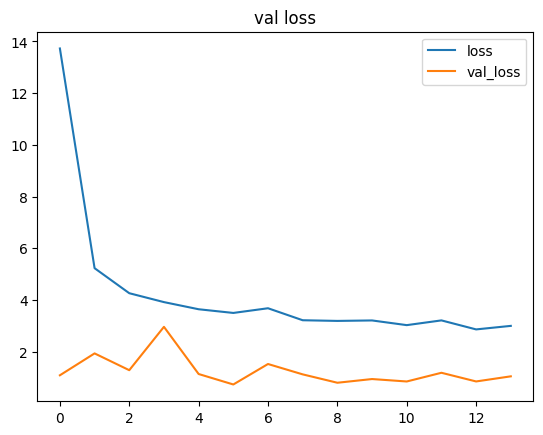

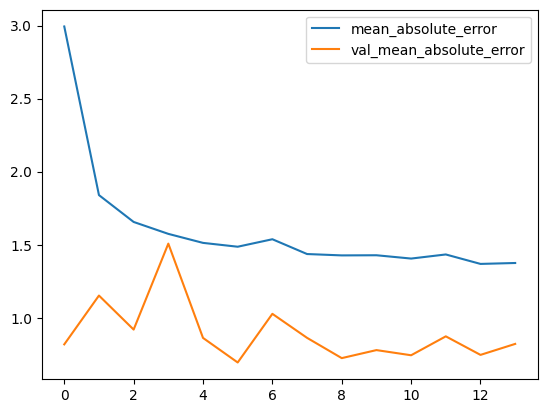

In [12]:
input_ids = keras.layers.Input(shape=(512,), dtype=tf.int32)
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

output = TFBertModelWrapper()(input_ids)
pooling = output[:, 0, :]
output_ids = reg(pooling)

model = keras.Model(inputs = input_ids, outputs = output_ids)
for layer in bert_model.layers:
    layer.trainable = False

model.compile(optimizer = "adam",
             loss = "mean_squared_error",
             metrics = ["mean_absolute_error"])

early_stopping = keras.callbacks.EarlyStopping(
    patience=8,
    min_delta=0,
    monitor = "val_loss",
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="val loss")
history_df.loc[:, ['mean_absolute_error', 'val_mean_absolute_error']].plot()

y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


# Trial Inference

In [13]:
def round_to_nearest_half(num):
  return round(num * 2) /2

In [23]:

#A BAND 7
text = """
Nowadays an increasing number of people are becoming concerned about their health and the quality of their diet. There are two diametrically opposed opinions on the matter. Some people believe that each and every individual is responsible for their own health while others state that it is the government that must ensure that the citizens have healthy eating habits.
Personally, I believe that people bear full responsibility for their diets for a number of reasons. First, nowadays there is a vast variety of products that everyone can choose from, ensuring a balanced diet consisting of different types of products with sufficient vitamins, proteins, carbohydrates and fats. Everyone can balance their diets according to these factors and also based on their taste preferences.  For example vegetarians will prefer beans rich in protein while omnivorous eaters might opt for meat instead. Secondly, while governments cannot considerably vary in their healthy eating programs usually adhering to 'one size fits all' approach, individuals know exactly what they need in order to keep fit and healthy both generally speaking and in terms of food. We take tailored approach as we know exactly what we need to succeed in life, be strong and healthy.
However, others argue that the government is fully responsible for the kind of food its population consume because they make decisions regarding the quality of food their country produce and import as well as prices. For instance, in many developing countries people rarely have access to high quality food, thus being forced to choose something cheap like fast food. Moreover, the government can introduce legislation as regards to what kind of food can be promoted, seen for example in many European countries where the advertising of fast food, alcohol and cigarettes is prohibited. These measure, it is argued, can affect the way we eat and control the diets of the whole population.
In conclusion, while the governments may play a role in the choice of food of its citizens, it is still the responsibility of every individual whether to eat healthy diet or not due to many reasons being that a variety of methods to balance their diets or their finances. After all our life is in our hands!"""

new_input_ids = bert_tokenizer(text, padding=True, truncation=True, return_tensors='tf', max_length=512)['input_ids']
response = model.predict(new_input_ids)
response = response.tolist()[0][0]
print("IELTS Score is: ",round_to_nearest_half(response))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
IELTS Score is:  6.0


This highlights the need for further improvements

# STREAMLIT

In [24]:
# Use Best Model (Fine-Tuned BERT)
count = 0
def main():
    global count
    st.title("Grade Your IELTS!")
    st.write("Please enter your essay to start grading.")

    count += 1
    user_input = st.text_input("You:", key=f"user_input_{count}")

    if user_input:
        new_input_ids = bert_tokenizer(user_input, padding=True, truncation=True, return_tensors='tf', max_length=512)['input_ids']
        response = model.predict(new_input_ids)
        response = response.tolist()[0][0]
        st.text_area("Your score:", value=round_to_nearest_half(response), height=101, max_chars=None, key=f"chatbot_response_{count}")
        st.write("Thank you!")
        st.stop()

if __name__ == '__main__':
    main()

2025-03-11 16:07:39.163 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:07:39.302 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-11 16:07:39.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:07:39.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:07:39.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:07:39.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:07:39.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:07:39.313 Thread 'MainThread': mi

# DASH

In [25]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [26]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

history = []
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("IELTS Grader",style={'text-align': 'center'}),

    html.Div([
        html.Div([
            html.Table([
                html.Tr([
                    html.Td([dcc.Input(id = "messageinput", value = "hello", type = "text")],
                           style = {'valign': "middle"}),
                    html.Td([html.Button("Send", id = "sendButton", type="submit")],
                           style = {'valign': "middle"})
                ])
            ])
        ], style = {"width": "330px", "margin": "0 auto"}),
        html.Br(),
        html.Div(id = "convo")],
        id = "screen",
        style = {"width": "400px", "margin":"0 auto"})

])

@app.callback(
    Output(component_id = "convo", component_property = "children"),
    [Input(component_id = "sendButton", component_property = "n_clicks")],
    [State(component_id = "messageinput", component_property = "value")]
)

def update_output(click,text):
    global history
    if click > 0:
        new_input_ids = bert_tokenizer(text, padding=True, truncation=True, return_tensors='tf', max_length=512)['input_ids']
        response = model.predict(new_input_ids)
        response = response.tolist()[0][0]
        response = round_to_nearest_half(response)
        user = [html.H5(text, style = {"text-align": "left"})]
        bot = [html.H5(html.I(i), style = {"text-align": "right"}) for i in str(response)]
        history = user + bot + [html.Hr()] + history
        return history
    else:
        return ''

@app.callback(
    Output(component_id = "messageinput", component_property = "value"),
    [Input(component_id = "convo", component_property = "children")]
)

def clearInput(_):
    return ''

if __name__ == "__main__":
    app.run_server(debug = True)



<IPython.core.display.Javascript object>